# Import Packages 

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import os
import glob

## Load Dataframe

In [2]:
df = pd.read_csv("data/data.csv").iloc[: , 1:]
df

,ID,Gene,Sequences,Description,Organism,Types
0,M0RC99,Rab5a,M A N R G A T R P N G P N T G N K I C Q F K L ...,Ras related protein Rab 5A,Rattus norvegicus,Real
1,P08760,AK3,M G A S A R L L R A A I M G A P G S G K G T V ...,GTP AMP phosphotransferase AK3 mitochondrial,Bos taurus,Real
2,Q92963,RIT1,M D S G T R P V G S C C S S P A G L S R E Y K ...,GTP binding protein Rit1,Homo sapiens,Real
3,Q63942,Rab3d,M A S A S E P P A S P R D A A D Q N F D Y M F ...,GTP binding protein Rab 3D,Rattus norvegicus,Real
4,Q9VND8,Rheb,M P T K E R H I A M M G Y R S V G K S S L C I ...,GTP binding protein Rheb homolog,Drosophila melanogaster,Real
...,...,...,...,...,...,...
1402,seq196,None,Y P D V G E I Q M C F G C M G S P E N Y R A K ...,None,None,Artificial
1403,seq197,None,Y H V M P Y H Y T P I K I C N Y I P Y H L C Y ...,None,None,Artificial
1404,seq198,None,S L H D C Q L R M A D C S G W S G Q D Y S Q P ...,None,None,Artificial
1405,seq199,None,E V G P N A D D C W P W I P T F P K V E H Q D ...,None,None,Artificial


# Compute disatnce

Compute distance between rotein sequences (list of vectors), we take the embeddings with same length 

In [4]:
# load 3D numpy array
file_list = glob.glob(os.path.join(os.getcwd(), "output/train", '*.npy'))

embed_list = [np.load(file) for file in sorted(file_list)]

In [2]:
embed_list

In [4]:
def get_mean(embd_seq):
    '''
    Compute the mean of embeddings
    
    input:
        - embeddings array
        
    output:
        - mean embeddin
    '''
    #mean_seq = []
    for i in embd_seq:
        m = np.mean(i, axis=0)
        n = list(m)
        mean_seq.append(n)
    mean_arr = np.array(mean_seq)
    return mean_arr

In [5]:
# compute average of sequence
mean_seq = []
for embed in embed_list:
    mean_arr = get_mean(embed)
    
mean_arr.shape

(1407, 1024)

In [6]:
# save average array
save_path = os.path.join('data','mean.npy')
np.save(save_path, mean_arr)

In [ ]:
# # load average array
# mean_arr = np.load('mean.npy')

## Cosine Similarity

In [7]:
dm_cos = distance.pdist(mean_arr, 'cosine')
dm_cos = distance.squareform(dm_cos)
#print(dm_cos)
df_cos = pd.DataFrame(dm_cos)

In [8]:
# save Cosine Similarity dataframe 
df_cos.to_csv('data/cosine_similarity.csv')

In [ ]:
# # load Cosine Similarity dataframe 
# df_cos = pd.read_csv("data/cosine_similarity.csv")

## Euclidean distance 

In [9]:
dm_eu = distance.pdist(mean_arr, 'euclidean')
dm_eu = distance.squareform(dm_eu)
#print(dm_eu)
df_eu = pd.DataFrame(dm_eu)

In [10]:
# save Euclidean distance dataframe 
df_eu.to_csv('data/euclidean_distance.csv')

In [ ]:
# # load Euclidean distance dataframe 
# df_eu = pd.read_csv("data/euclidean_distance.csv")

# Projection 

In [12]:
from sklearn.preprocessing import normalize
from sklearn import manifold
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [13]:
color_dict = { 'Real':'red', 'Artificial':'blue'}

In [14]:
types = df['Types'].to_list()

## MDS

In [17]:
MDS_coords = manifold.MDS(n_components=2).fit_transform(mean_arr)

In [18]:
# save MDS coordinates
save_path = os.path.join('data','mds_coords.npy')
np.save(save_path, MDS_coords)

In [ ]:
# # load MDS coordinates
# MDS_coords = np.load('mds_coords.npy')

In [19]:
#os.mkdir('plot/')

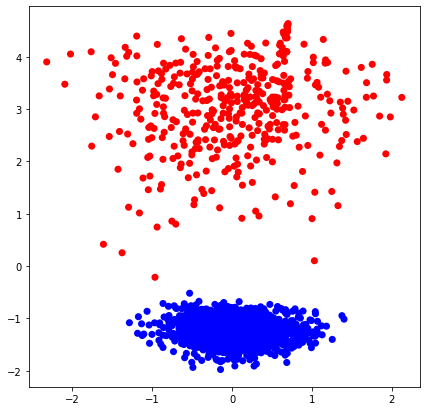

In [21]:

plt.figure(figsize=(7, 7))
#plt.scatter(MDS_coords[:, 0], MDS_coords[:, 1], marker='o', c=colors, s=50, edgecolor='None')
plt.scatter(MDS_coords[:, 0], MDS_coords[:, 1], marker='o', c=[color_dict[i] for i in types], s=50, edgecolor='None')

plt.savefig('plot/MDS.png')
plt.show()


## TSNE

In [22]:
tsne_coords = manifold.TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(mean_arr)

In [23]:
# save tsne coordinates
save_path = os.path.join('data','tsne_coords.npy')
np.save(save_path, tsne_coords)

In [ ]:
# # load tsne coordinates
# tsne_coords = np.load('tsne_coords.npy')

In [ ]:
tsne_coords.shape

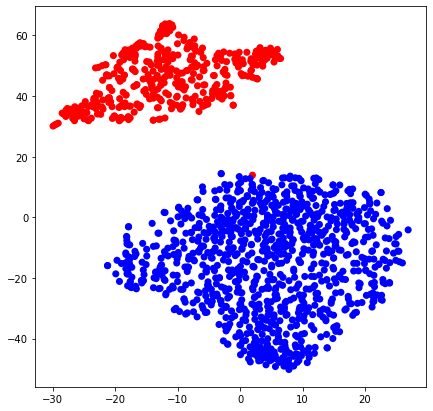

In [24]:

plt.figure(figsize=(7, 7))
#plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], marker='o', c=colors, s=50, edgecolor='None')
plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], marker='o', c=[color_dict[i] for i in types], s=50, edgecolor='None')

plt.savefig('plot/tsne.png')
plt.show()